In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


# Heart disease predication

In [3]:
# Read dataset
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\ドキュメント\Decision Tree Project\Dataset\HeartDisease.csv")
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Check any value if exists
value='?'
value in df

False

In [6]:
# Check for any null values in the dataset
df.isnull().sum() 

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

              age      gender  chest_pain    rest_bps  cholestrol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026   
std      9.082101    0.466011    1.032052   17.538143   51.830751   
min     29.000000    0.000000    0.000000   94.000000  126.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000   
max     77.000000    1.000000    3.000000  200.000000  564.000000   

       fasting_blood_sugar    rest_ecg     thalach  exer_angina    old_peak  \
count           303.000000  303.000000  303.000000   303.000000  303.000000   
mean              0.148515    0.528053  149.646865     0.326733    1.039604   
std               0.356198    0.525860   22.905161     0.469794    1.161075   
min               0.000000    0.000000   71.000000     0.00000

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

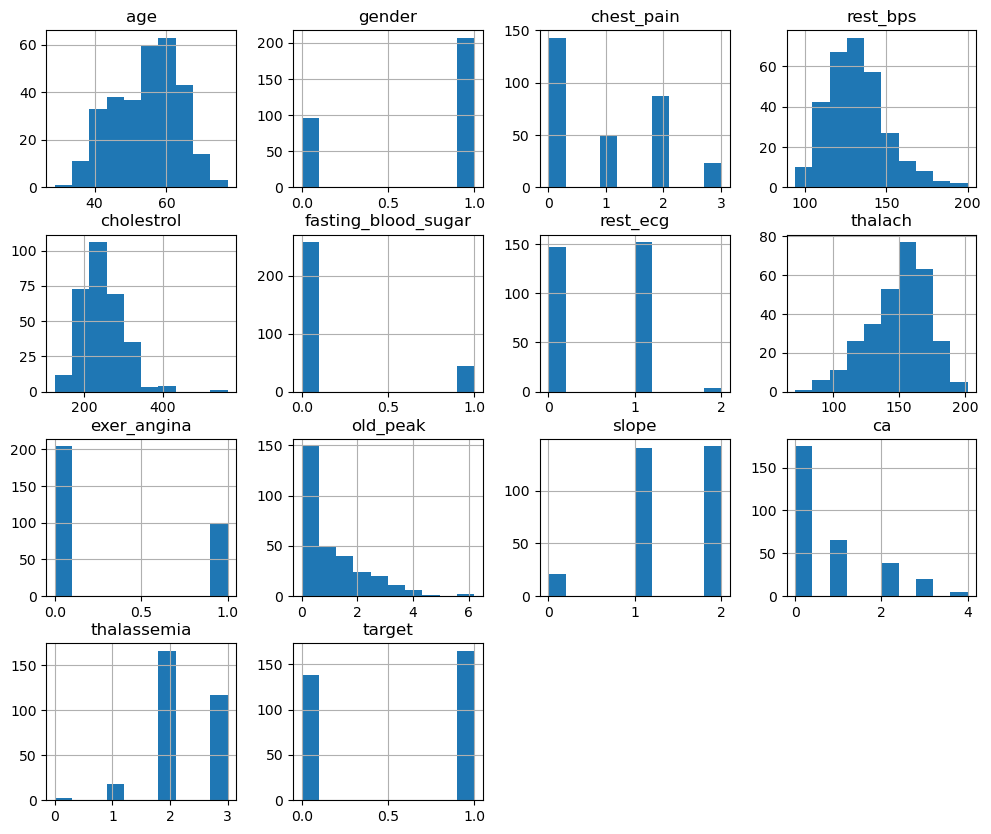

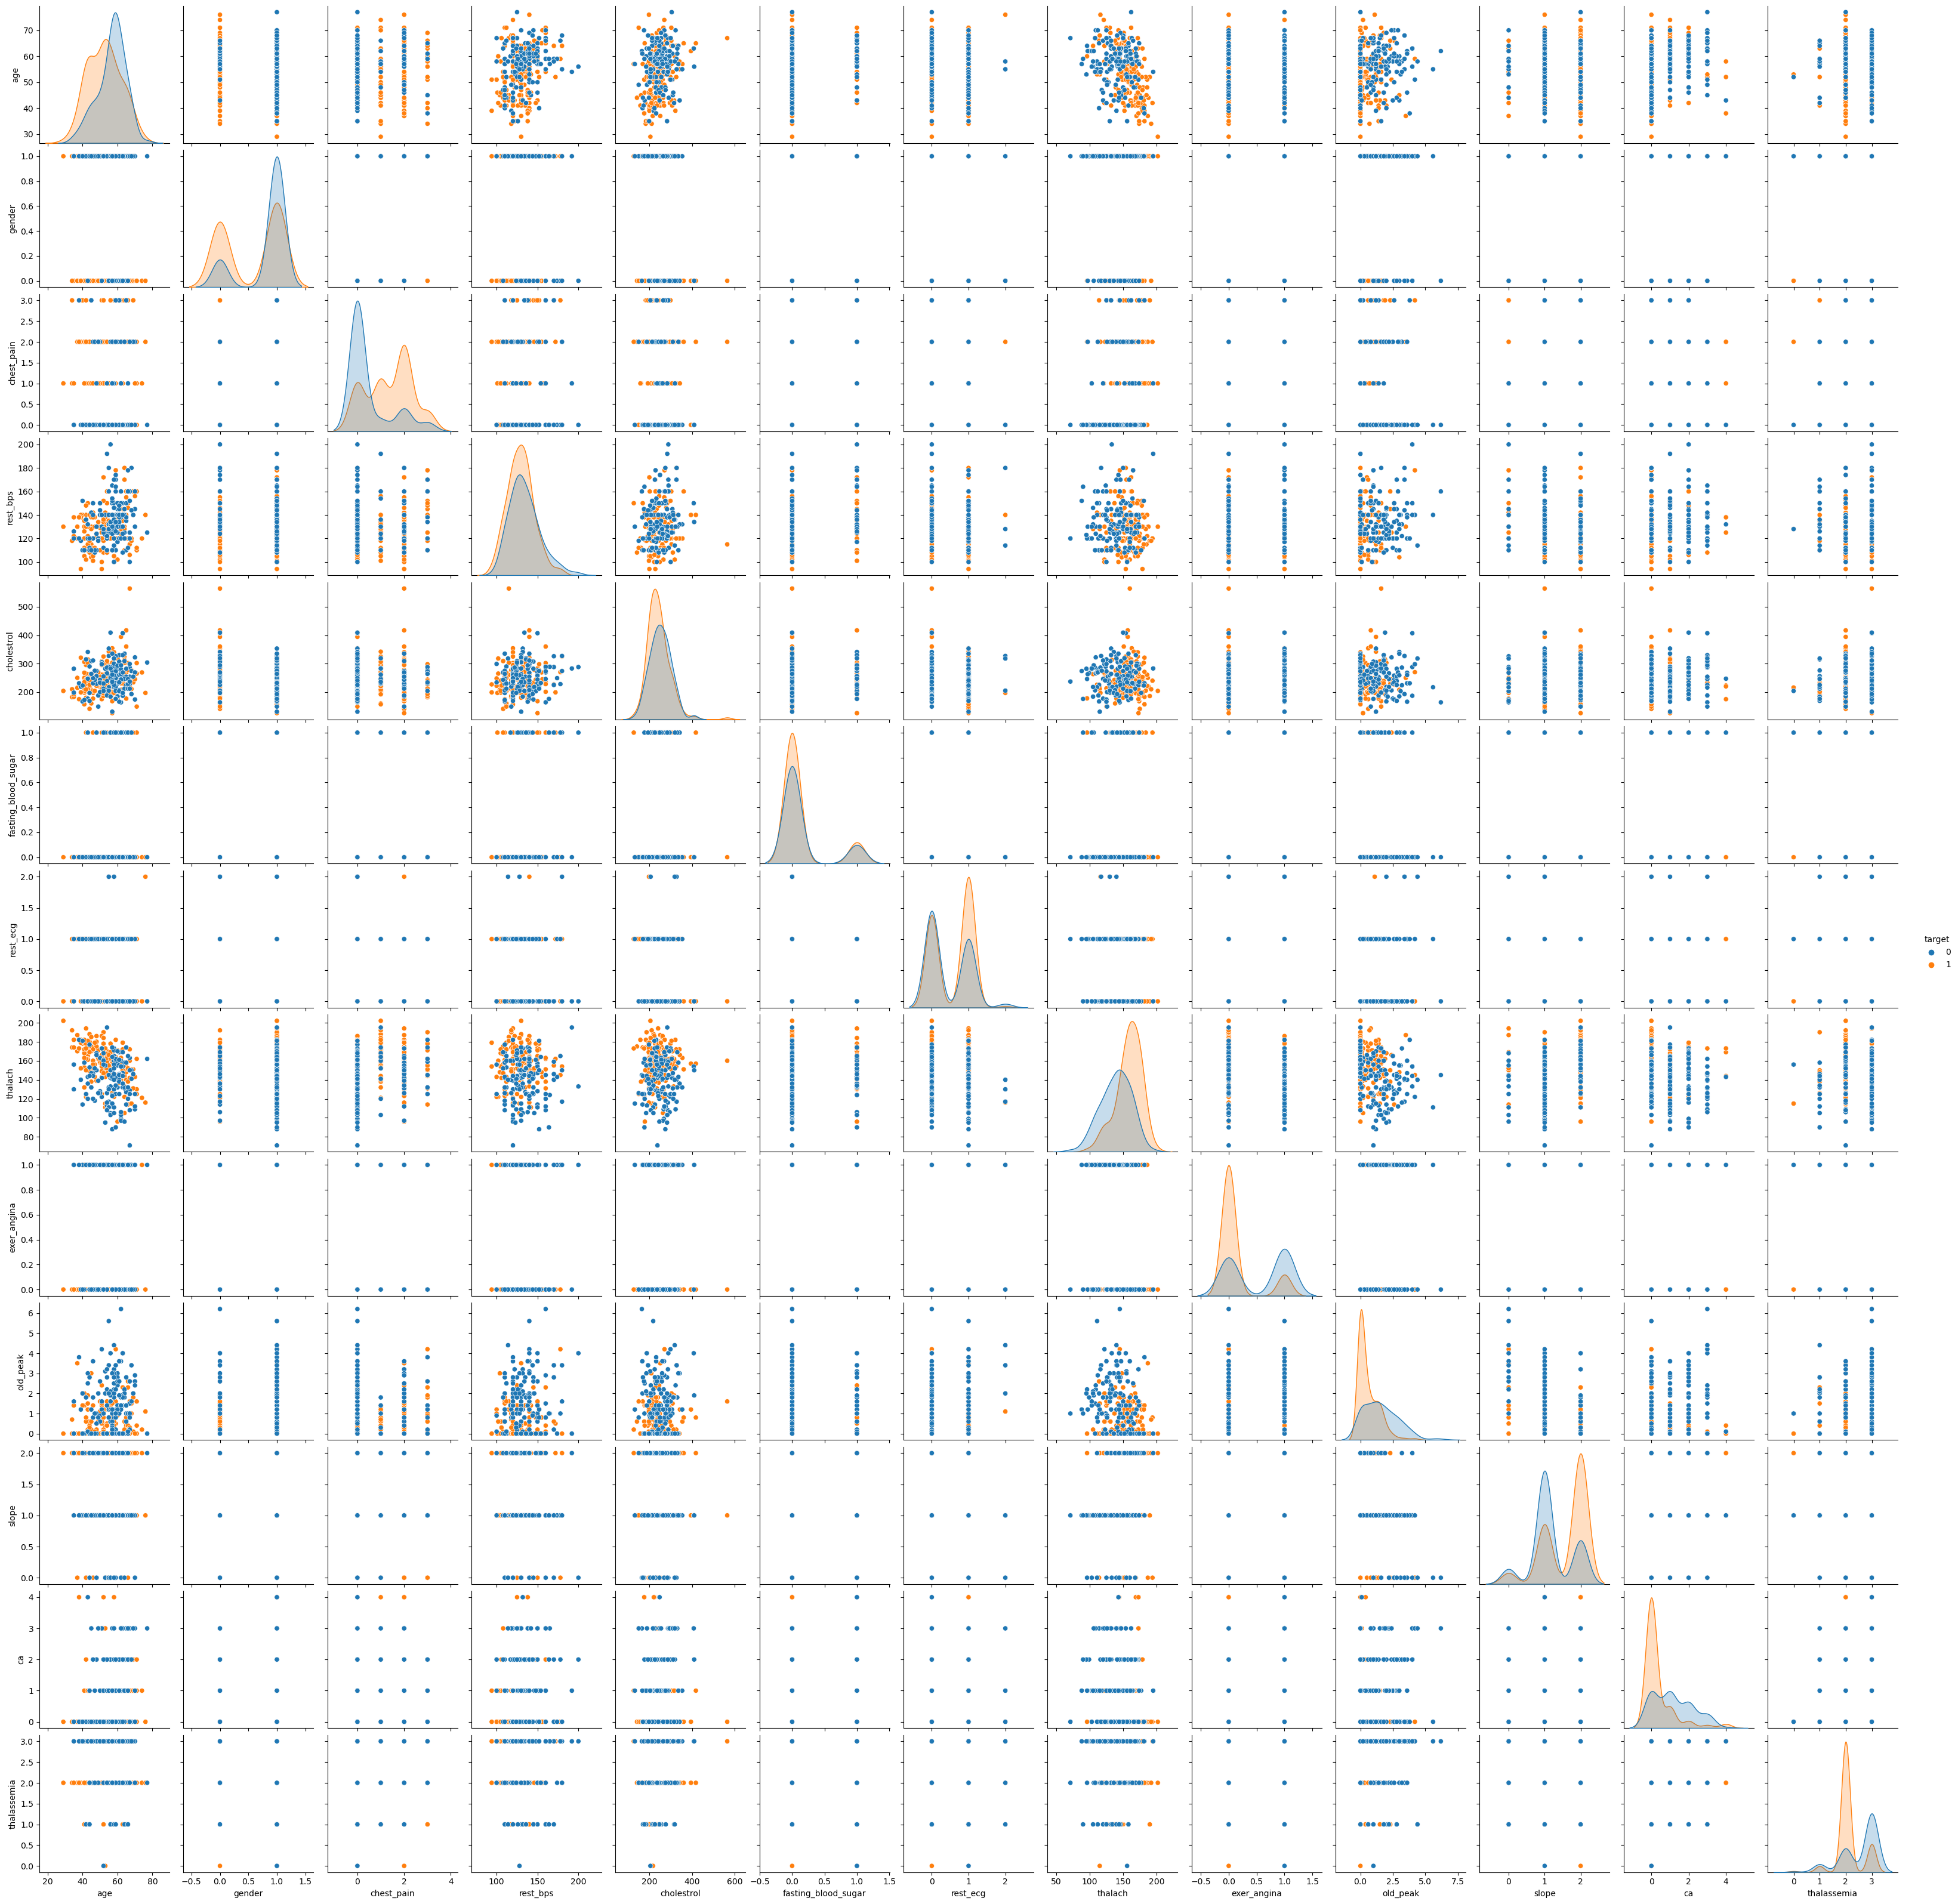

In [7]:
# df.replace=('?',np.nan,inplace=true)
# df=df.apply(pd.to_numeric)
# df.fillna(df.median(),inplace=true)



print(df.describe())
df.hist(figsize=(12,10))
plt.show
sns.pairplot(df,hue='target')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

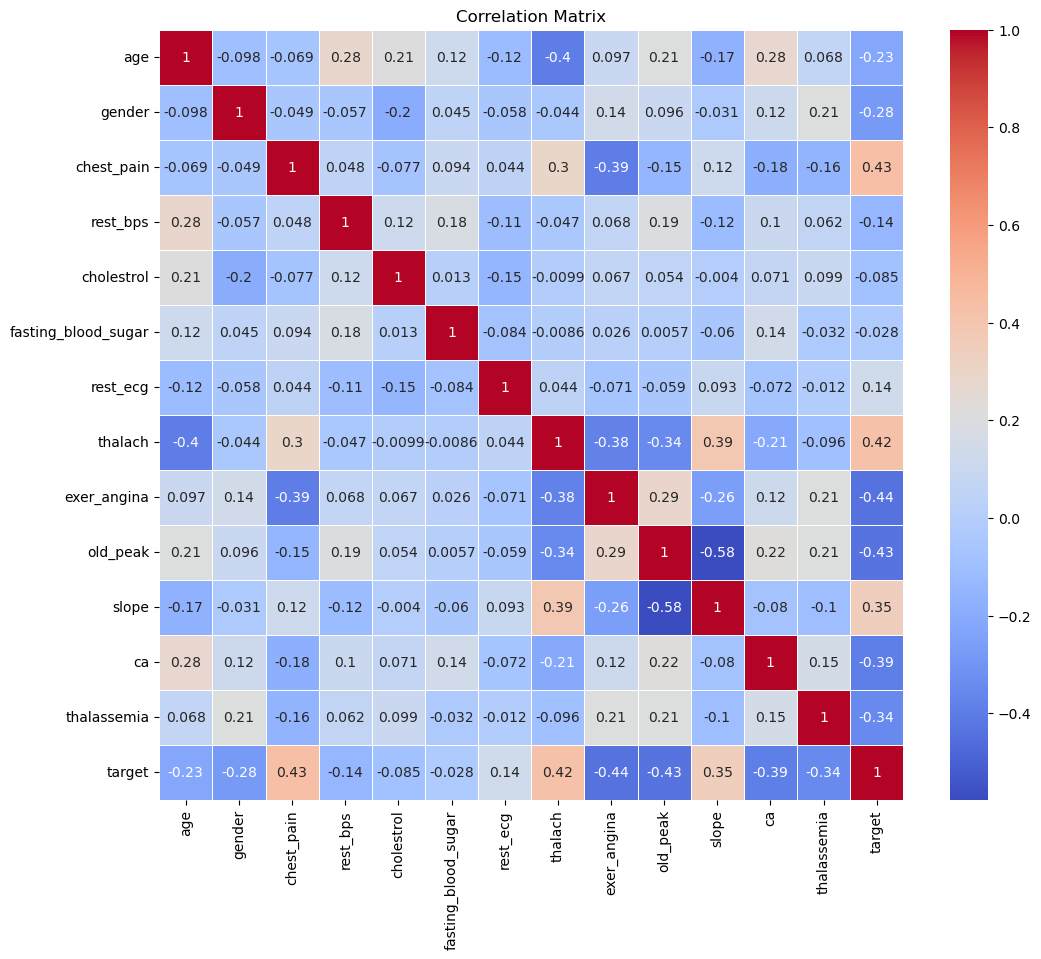

In [8]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

In [13]:
# Split the data into training and testing
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier(max_depth=5,random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
y_pred=classifier.predict(x_test)

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy',accuracy)



accuracy 0.819672131147541


<function matplotlib.pyplot.show(close=None, block=None)>

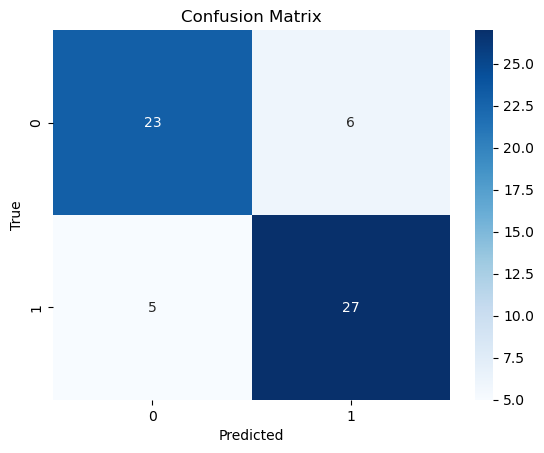

In [19]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show

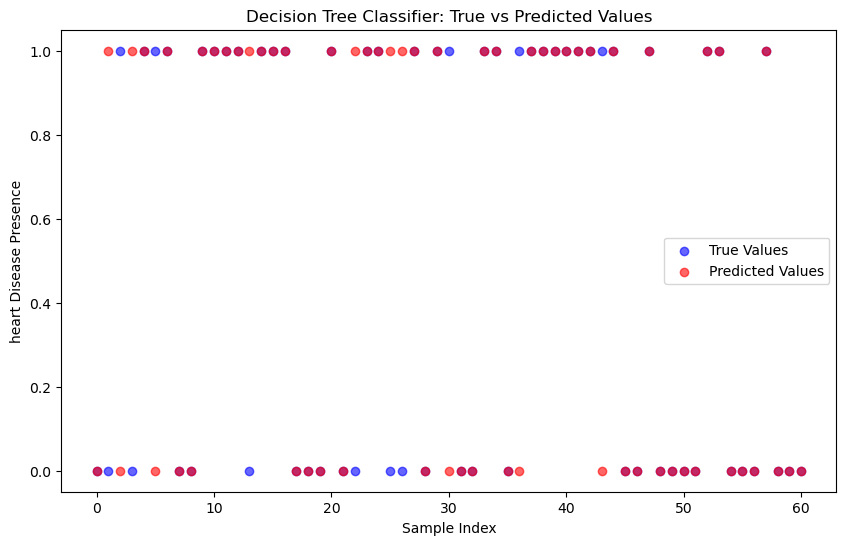

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='blue',label='True Values',alpha=0.6)
plt.scatter(range(len(y_pred)),y_pred,color='red',label='Predicted Values',alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('heart Disease Presence')
plt.title('Decision Tree Classifier: True vs Predicted Values') 
plt.legend()
plt.show()



In [ ]:
for cols in df.columns:
    unique_val=df[cols].unique()
    marker=1
    if cols=='doors'or cols=='persons':
        continue
    else:
        for i in unique_val:
            df[cols]=df[cols].replace(i,marker)
            marker=marker+1
            
df.head()            